In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('IMDB Dataset.csv')
df['sentiment'].value_counts()
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

In [3]:
# 2.1 Turn sentiment into categorical value
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['sentiment'] = labelencoder.fit_transform(train['sentiment'])
test['sentiment'] = labelencoder.fit_transform(test['sentiment'])

D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
# 2.2 Remove none text and special character
import re
import string
pattern = re.compile(r'<br\s*/><br\s*/>>*|(\-)|(\\)|(\/)')
def preprocess_reviews(reviews):
    reviews = [pattern.sub(" ",item) for item in reviews]
    return reviews
train_clean = preprocess_reviews(train['review'])
test_clean = preprocess_reviews(test['review'])
train['review'] = train_clean
test['review'] = test_clean
def remove_punctuation(input):
    table = str.maketrans('','',string.punctuation)
    return input.translate(table)
train['review'] = train['review'].apply(remove_punctuation)
test['review'] = test['review'].apply(remove_punctuation)

D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [5]:
# 2.3 Convert all text to lowercase
train['review'] = train['review'].str.lower()
test['review'] = test['review'].str.lower()

D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# 2.4 Remove line breaks
def remove_linebreaks(input):
    text = re.compile(r'\n')
    return text.sub(r' ',input)
train['review'] = train['review'].apply(remove_linebreaks)
test['review'] = test['review'].apply(remove_linebreaks)

D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
# 2.5 Tokenization
from nltk.tokenize import word_tokenize
train['review'] = train['review'].apply(word_tokenize)
test['review'] = test['review'].apply(word_tokenize)

D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
# 2.6 Remove stopword
from nltk.corpus import stopwords
def remove_stopwords(input1):
    words = []
    for word in input1:
        if word not in stopwords.words('english'):
            words.append(word)
    return words
train['review'] = train['review'].apply(remove_stopwords)
test['review'] = test['review'].apply(remove_stopwords)

D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
# 2.7 Lemmatization
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lem.lemmatize(w) for w in input]
train['review'] = train['review'].apply(lemma_wordnet)
test['review'] = test['review'].apply(lemma_wordnet)

D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
# 2.8 Combine individual words
def combine_text(input):
    combined = ' '.join(input)
    return combined
train['review'] = train['review'].apply(combine_text)
test['review'] = test['review'].apply(combine_text)

D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# 3.1 Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(train)
X_train_bow = cv.fit_transform(train['review'])
X_test_bow = train['sentiment']
Y_train_bow = cv.transform(test['review'])
Y_test = test['sentiment']

In [12]:
# 3.2 TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm = None)
vectorizer.fit(train)
X_train_tfidf = vectorizer.fit_transform(train['review'])
X_test_tfidf = train['sentiment']
Y_train_tdidf =vectorizer.transform(test['review'])

In [13]:
# 3.3 Hashing
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
hv.fit(train)
X_train_hash = hv.fit_transform(train['review'])
X_test_hash = train['sentiment']
Y_train_hash = hv.transform(test['review'])

In [14]:
# Rigde with bag of word
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alpha = [80.0, 90.0, 100.0, 110.0, 120.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = cross_val_score(ridge, X_train_bow, X_test_bow, cv=5, scoring='f1')
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  80.0
[0.88011696 0.87651715 0.88725361 0.88203648 0.88368421]
0.8819216823610248


alpha:  90.0
[0.88130643 0.87762376 0.8874294  0.88183607 0.88406369]
0.882451868708233


alpha:  100.0
[0.88065844 0.87889182 0.88798424 0.8834163  0.88427144]
0.8830444460058289


alpha:  110.0
[0.88181456 0.87910349 0.88856805 0.88467077 0.88468113]
0.8837676021627912


alpha:  120.0
[0.88199417 0.87854411 0.89008536 0.88464057 0.88439306]
0.8839314529860243




In [15]:
# MultinomialNB with bag of word
from sklearn.naive_bayes import MultinomialNB
alpha = [1e-10, 1e-5, 0.1, 1.0, 2.0, 5.0]
for a in alpha:
    mnb = MultinomialNB(alpha=a)
    scores = cross_val_score(mnb, X_train_bow, X_test_bow, cv=5, scoring='f1')
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1e-10
[0.791605   0.78179634 0.78357708 0.78826222 0.78936056]
0.7869202410993955


alpha:  1e-05
[0.81794768 0.80699395 0.80822845 0.81411126 0.81227094]
0.8119104540567393


alpha:  0.1
[0.8526244  0.84447458 0.85072583 0.8547593  0.84791496]
0.8500998142684753


alpha:  1.0
[0.8573775  0.84813052 0.85228364 0.85513826 0.84716516]
0.8520190154697875


alpha:  2.0
[0.85714286 0.84670936 0.85089409 0.8550585  0.84553069]
0.8510670981864834


alpha:  5.0
[0.85714286 0.84394643 0.84958678 0.84968944 0.84303205]
0.8486795124751101




In [16]:
# Rigde with TF-IDF
alpha = [500.0, 1500.0, 2500.0, 3000.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = cross_val_score(ridge, X_train_tfidf, X_test_tfidf, cv=5, scoring='f1')
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  500.0
[0.85160946 0.84266384 0.85110343 0.845991   0.85343915]
0.8489613758482646


alpha:  1500.0
[0.87118194 0.86302097 0.87046358 0.87099338 0.87377872]
0.8698877161622214


alpha:  2500.0
[0.8800848  0.87087803 0.87695157 0.8772998  0.88100264]
0.8772433691554291


alpha:  3000.0
[0.8801061  0.87395847 0.87929213 0.88009529 0.88361671]
0.8794137404208084




In [18]:
# MultinomialNB with TF-IDF
alpha = [175.0, 200.0, 225.0, 250.0, 300.0]
for a in alpha:
    mnb = MultinomialNB(a)
    scores = cross_val_score(mnb, X_train_tfidf, X_test_tfidf, cv=5, scoring='f1')
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  175.0
[0.85626338 0.84925633 0.85457954 0.8566058  0.8479829 ]
0.8529375911061005




D:\InstallWindows\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass alpha=200.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


alpha:  200.0
[0.85630342 0.84977279 0.85504145 0.85691297 0.84766094]
0.8531383130139216




D:\InstallWindows\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass alpha=225.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


alpha:  225.0
[0.85573202 0.85119445 0.85584624 0.85695151 0.84808947]
0.853562736598511




D:\InstallWindows\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass alpha=250.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


alpha:  250.0
[0.85584745 0.8519259  0.85561783 0.85706638 0.84878308]
0.8538481268485618




D:\InstallWindows\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass alpha=300.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


alpha:  300.0
[0.85630577 0.85189621 0.85470541 0.85752473 0.84872611]
0.8538316453094801




In [19]:
# Rigde with Hash
alpha = [1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = cross_val_score(ridge, X_train_hash, X_test_hash, cv=5, scoring='f1')
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1.1
[0.88803294 0.88278049 0.89737155 0.89209204 0.8950364 ]
0.8910626843528124


alpha:  1.2
[0.88891838 0.88289717 0.89681596 0.89226702 0.8952658 ]
0.891232866829448


alpha:  1.3
[0.8882103  0.88190225 0.89722589 0.89320132 0.89517515]
0.891142981787208


alpha:  1.4
[0.88818146 0.88199578 0.89646064 0.8929938  0.89455603]
0.8908375402131125


alpha:  1.5
[0.88877105 0.88202692 0.89711716 0.89352157 0.89393739]
0.8910748192510545


alpha:  2.0
[0.88918276 0.88191054 0.89513999 0.89328063 0.89284772]
0.8904723274188321




In [20]:
from sklearn.metrics import accuracy_score
ridge = linear_model.RidgeClassifier(1.4)
ridge.fit(X_train_hash, X_test_hash)
test['sentiment_pred'] = ridge.predict(Y_train_hash)
y_true = test['sentiment']
y_pred = test['sentiment_pred']
accuracy_score(y_true, y_pred)

D:\InstallWindows\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0.89496

In [21]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_true, y_pred, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.90      0.89      0.89      6199
Good Reviews       0.89      0.90      0.90      6301

    accuracy                           0.89     12500
   macro avg       0.90      0.89      0.89     12500
weighted avg       0.90      0.89      0.89     12500



Text(23.999999999999996, 0.5, 'Actual')

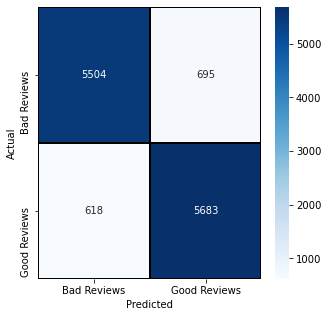

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")